In [ ]:

#Dataset link on kaggle: https://www.kaggle.com/datasets/swaptr/turkey-earthquake-tweets 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/turkey-earthquake-tweets/tweets.csv')
print("Dataset shape: ", df.shape)
print("\nData types:\n", df.dtypes)

Dataset shape:  (478052, 11)

Data types:
 date                object
content             object
hashtags            object
like_count         float64
rt_count           float64
followers_count    float64
isVerified          object
language            object
coordinates         object
place               object
source              object
dtype: object


In [4]:
print("\nMissing values per column:\n", df.isnull().sum())
print("\nNumber of duplicates: ", df.duplicated().sum())
print("\nNumerical features summary:\n", df.describe())



Missing values per column:
 date                    0
content                 0
hashtags               18
like_count             17
rt_count               17
followers_count        17
isVerified             17
language               17
coordinates        457383
place              457856
source                 17
dtype: int64

Number of duplicates:  1

Numerical features summary:
           like_count       rt_count  followers_count
count  478035.000000  478035.000000     4.780350e+05
mean       17.330147       6.384424     5.509884e+04
std       376.108495      83.705230     6.289395e+05
min         0.000000       0.000000     0.000000e+00
25%         0.000000       0.000000     5.200000e+01
50%         1.000000       0.000000     3.240000e+02
75%         4.000000       2.000000     2.006000e+03
max    146023.000000   17153.000000     2.575509e+07


In [9]:
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [10]:
print("\nValue counts of categorical features:")
for column_name in df.select_dtypes(include=['object']):
    print(f"{column_name}: \n{df[column_name].value_counts()}\n")


Value counts of categorical features:
content: 
Pray for #Turkey                                                                                                                                                                                                                                                                                                  4
#Turkey                                                                                                                                                                                                                                                                                                           4
@rprefahpartisi Sn. @ErbakanFatih bey açıklama yapıyor  Cevahir AVM  İstanbulda LÜTFEN YARDIM EDİN  Marmara Cebrail İnsanlar Türkiyem Müge Anlı ÖNEMLİ DUYURU Kahramanmaraş’ta 7.4 Yazıklar Kahramanmaraş Pazarcık Allah,dan #DEPREMOLDU #deprem Allah dan  #Turkey #Enkaz #nurdagi https://t.co/Mg8p2WSLYX       3
⚠🌊TSUNAMI RISK UNDER EVALUA

In [27]:
print("\nMissing values per column:\n", df.isnull().sum())
print("\nNumber of duplicates: ", df.duplicated().sum())
print("\nNumerical features summary:\n", df.describe())


Missing values per column:
 content            0
hashtags           0
like_count         0
rt_count           0
followers_count    0
isVerified         0
language           0
coordinates        0
place              0
source             0
date_only          0
hour               0
dtype: int64

Number of duplicates:  4

Numerical features summary:
          like_count      rt_count  followers_count          hour
count  20196.000000  20196.000000     2.019600e+04  20196.000000
mean       9.827738      3.830808     3.941938e+04     12.472272
std      110.143967     49.221803     1.497244e+05      6.164693
min        0.000000      0.000000     0.000000e+00      0.000000
25%        0.000000      0.000000     9.600000e+01      8.000000
50%        1.000000      0.000000     6.170000e+02     13.000000
75%        4.000000      1.000000     8.387750e+03     18.000000
max     9975.000000   4226.000000     6.119073e+06     23.000000


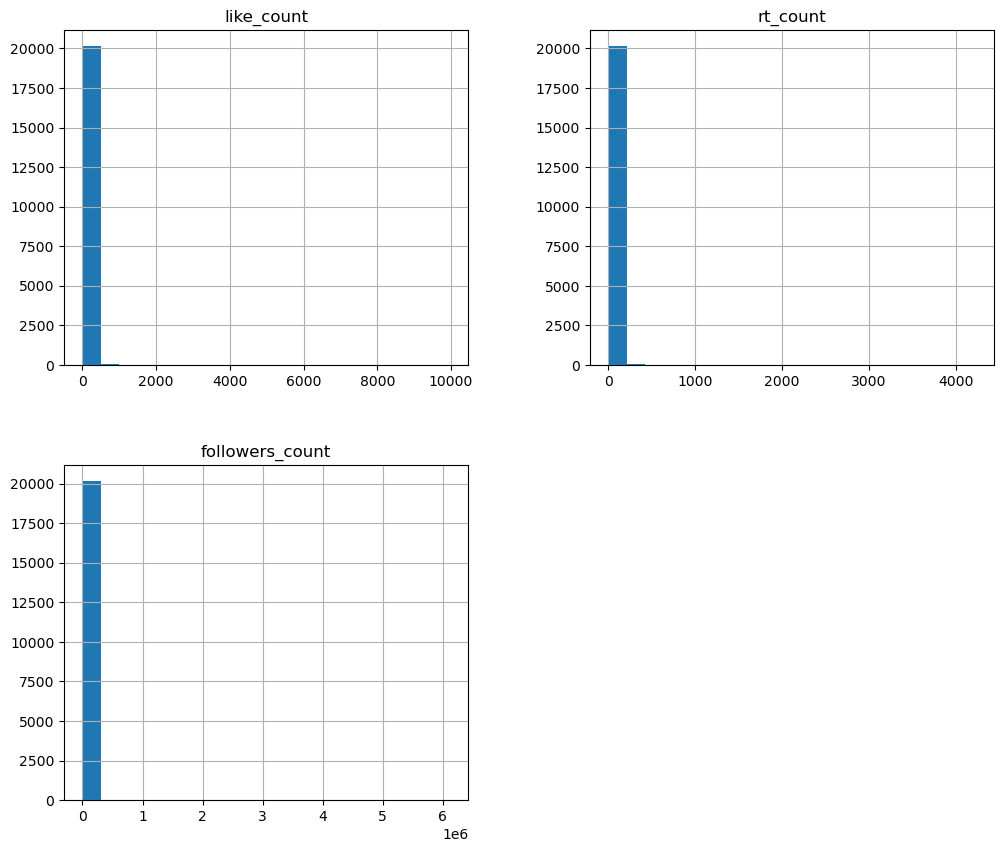

In [11]:
df.select_dtypes(include=['float', 'int']).hist(bins=20, figsize=(12,10))
plt.show()

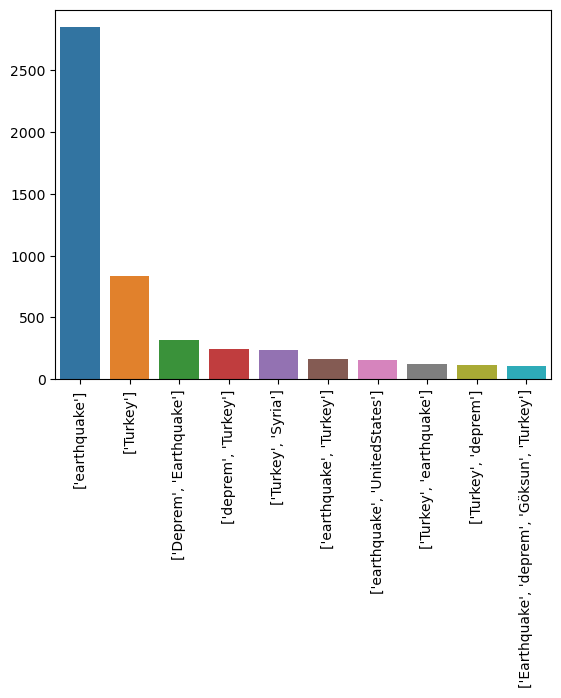

In [12]:
top_hashtags = df['hashtags'].value_counts().nlargest(10)
sns.barplot(x=top_hashtags.index, y=top_hashtags.values)
plt.xticks(rotation=90)
plt.show()

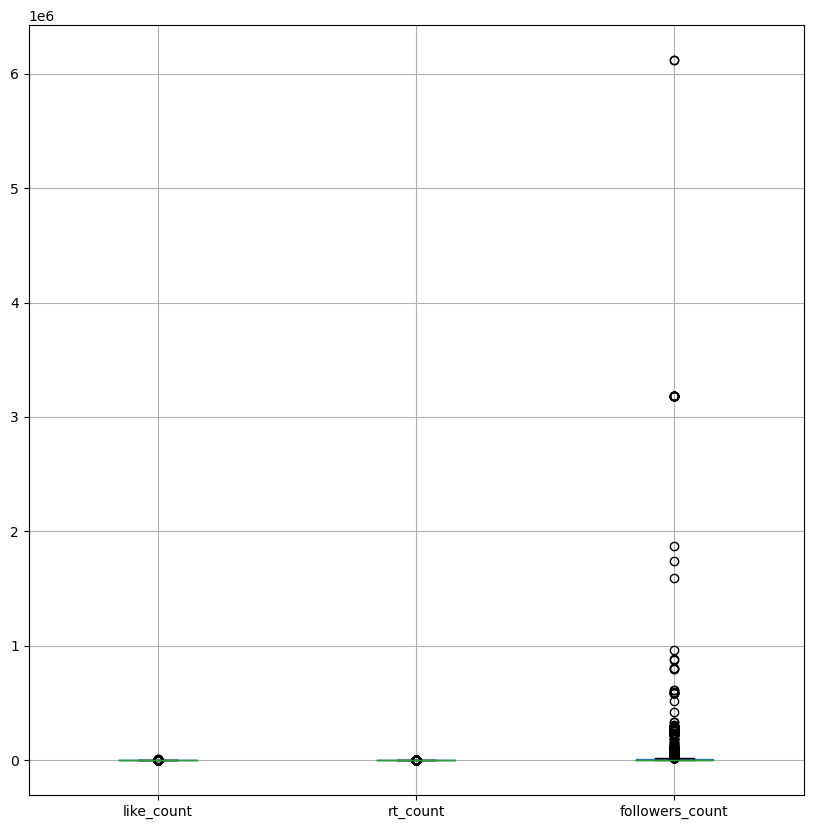

In [13]:
df.boxplot(figsize=(10,10))
plt.show()

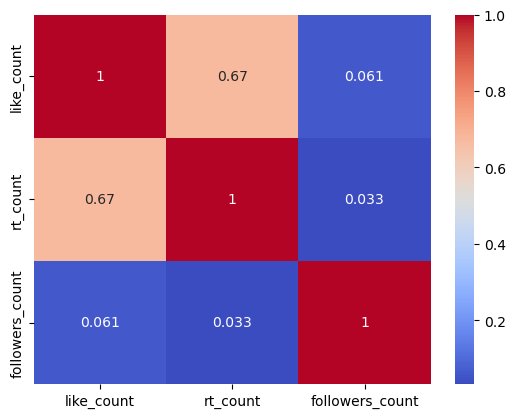

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

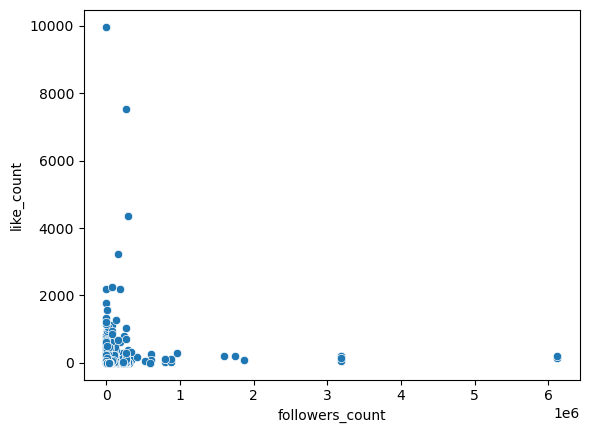

In [15]:
sns.scatterplot(x='followers_count', y='like_count', data=df)
plt.show()


<AxesSubplot:xlabel='isVerified', ylabel='like_count'>

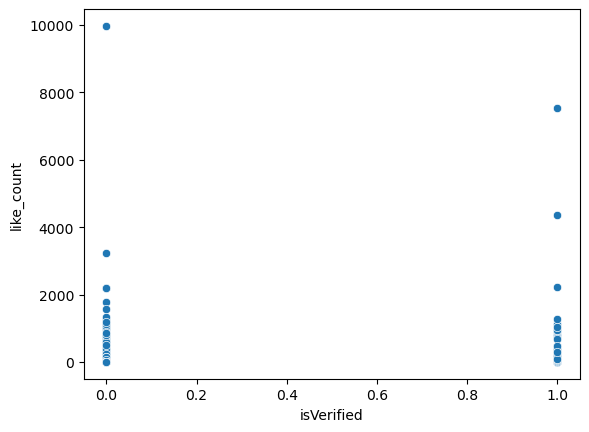

In [16]:
sns.scatterplot(x='isVerified', y='like_count', data=df)


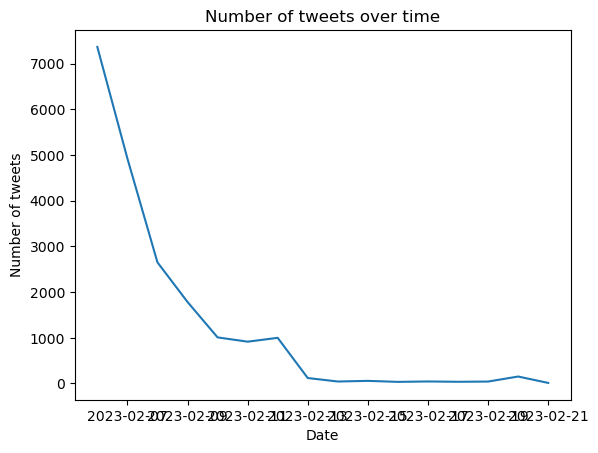

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['date_only'] = df['date'].dt.date
date_counts = df['date_only'].value_counts().sort_index()
plt.plot(date_counts.index, date_counts.values)
plt.title("Number of tweets over time")
plt.xlabel("Date")
plt.ylabel("Number of tweets")
plt.show()

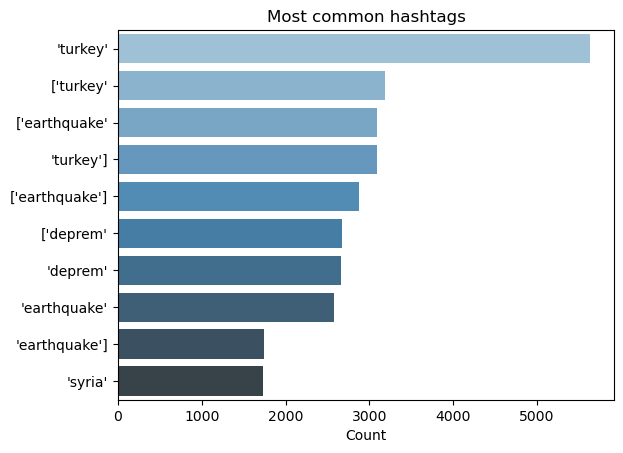

In [18]:
hashtags = []
for row in df['hashtags']:
    if isinstance(row, str):
        row_hashtags = row.split(',')
        for hashtag in row_hashtags:
            hashtags.append(hashtag.strip().lower())
hashtag_counts = pd.Series(hashtags).value_counts().head(10)
sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette="Blues_d")
plt.title("Most common hashtags")
plt.xlabel("Count")
plt.show()

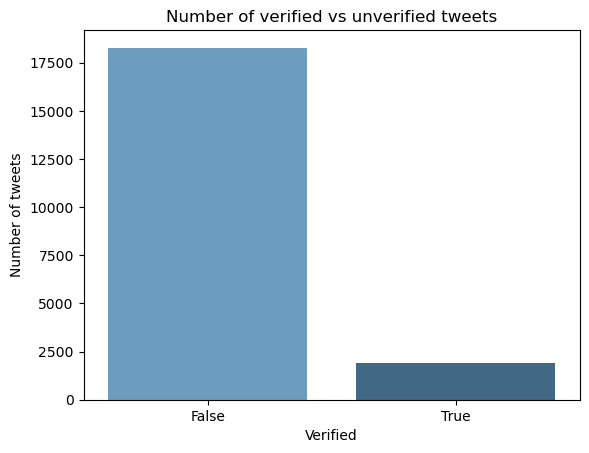

In [19]:
verified_counts = df['isVerified'].value_counts()
sns.barplot(x=verified_counts.index, y=verified_counts.values, palette="Blues_d")
plt.title("Number of verified vs unverified tweets")
plt.xlabel("Verified")
plt.ylabel("Number of tweets")
plt.show()

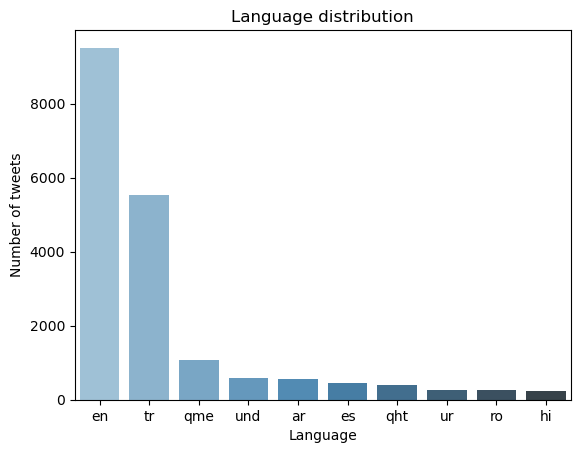

In [20]:
language_counts = df['language'].value_counts().head(10)
sns.barplot(x=language_counts.index, y=language_counts.values, palette="Blues_d")
plt.title("Language distribution")
plt.xlabel("Language")
plt.ylabel("Number of tweets")
plt.show()

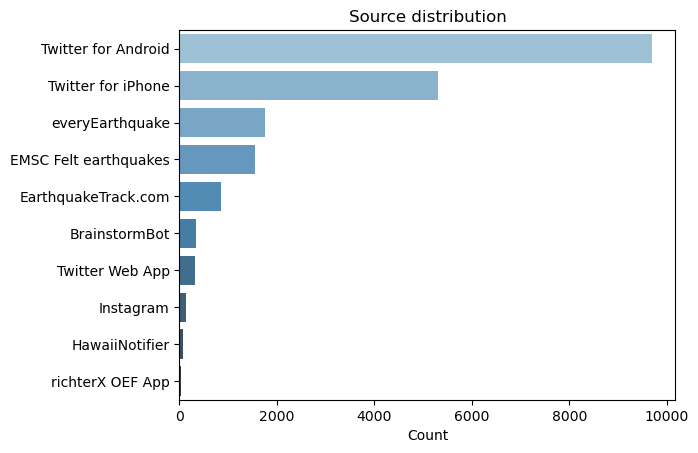

In [21]:
source_counts = df['source'].value_counts().head(10)
sns.barplot(x=source_counts.values, y=source_counts.index, palette="Blues_d")
plt.title("Source distribution")
plt.xlabel("Count")
plt.show()

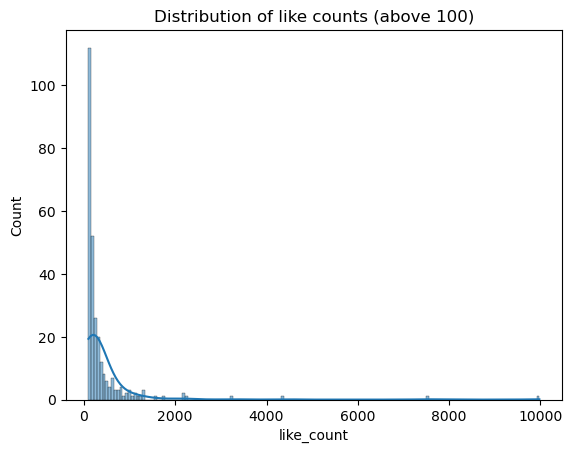

In [22]:
filtered_df = df[df['like_count'] > 100]
sns.histplot(data=filtered_df, x="like_count", kde=True)
plt.title("Distribution of like counts (above 100)")
plt.show()


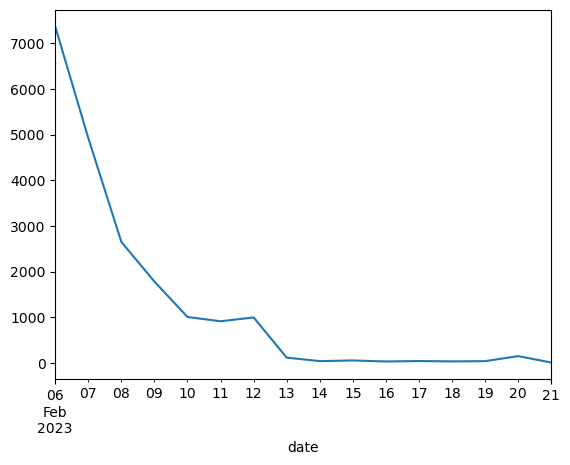

In [23]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.resample('D').size().plot()
plt.show()

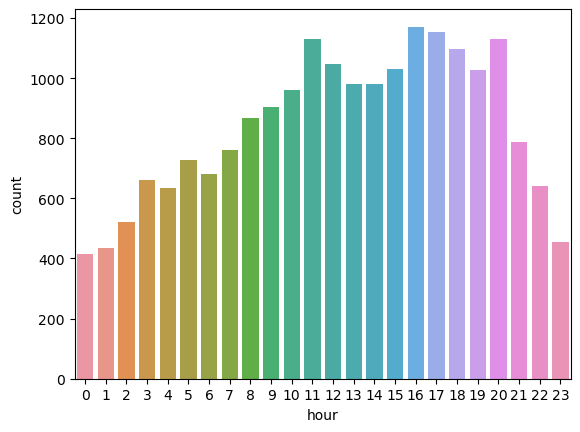

In [24]:
df['hour'] = df.index.hour
sns.countplot(data=df, x='hour')
plt.show()


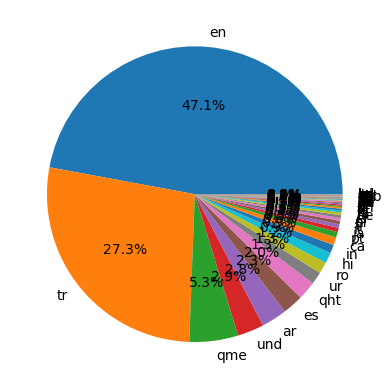

In [25]:
language_counts = df['language'].value_counts()
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.show()

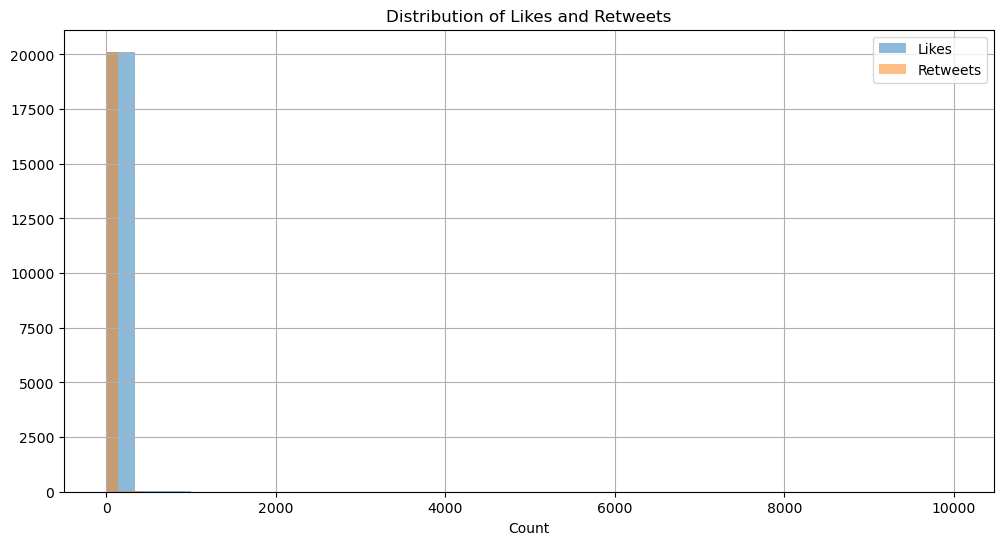

In [26]:
plt.figure(figsize=(12, 6))
df['like_count'].hist(alpha=0.5, bins=30, label='Likes')
df['rt_count'].hist(alpha=0.5, bins=30, label='Retweets')
plt.legend()
plt.title('Distribution of Likes and Retweets')
plt.xlabel('Count')
plt.show()
